In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
data = wine.data
label = wine.target
columns = wine.feature_names
data = pd.DataFrame(data,columns=columns)
print(data.head(3))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  


In [6]:
# k-Means

# 데이터 전처리
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [7]:
data.shape

(178, 13)

In [8]:
# 주성분분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data[:5,:]

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722],
       [-0.82164366, -0.58090551],
       [-0.20254638, -0.05946657]])

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [10]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [11]:
cluster = kmeans.predict(data)
print(type(cluster))

<class 'numpy.ndarray'>


In [12]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

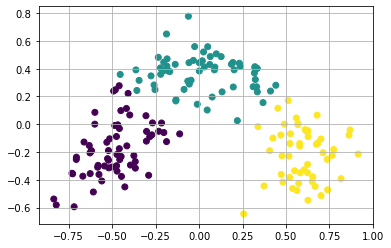

In [13]:
plt.scatter(data[:,0],data[:,1],c=cluster)
plt.grid()
plt.show()

In [14]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3,linkage='single')
complete_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
average_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')

In [15]:
single_clustering.fit(data)
complete_clustering.fit(data)
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [16]:
single_cluster = single_clustering.labels_
print(single_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
complete_cluster = complete_clustering.labels_
print(complete_cluster)

[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
average_cluster = average_clustering.labels_
print(average_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


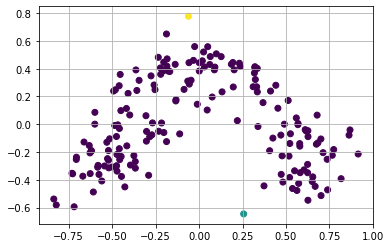

In [19]:
# 시각화
plt.scatter(data[:,0],data[:,1],c=single_cluster)
plt.grid()
plt.show()
# 성능이 영 좋지않은 모습

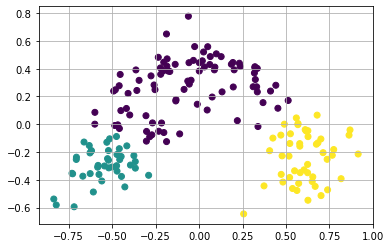

In [20]:
plt.scatter(data[:,0],data[:,1],c=complete_cluster)
plt.grid()
plt.show()

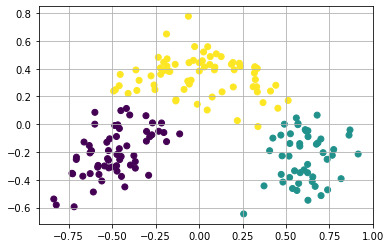

In [21]:
plt.scatter(data[:,0],data[:,1],c=average_cluster)
plt.grid()
plt.show()

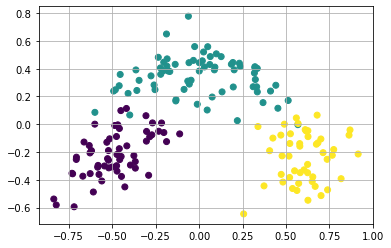

In [22]:
plt.scatter(data[:,0],data[:,1],c=label)
plt.grid()
plt.show()

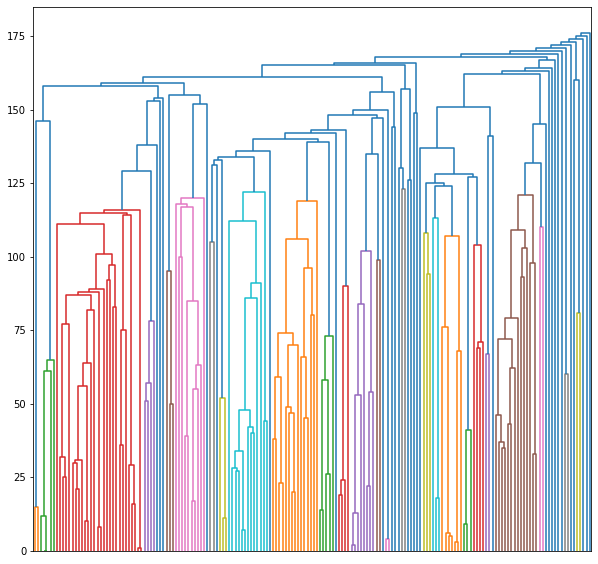

In [23]:
# 계층적 군집 분석 덴드로그램 그려보기
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))
children = single_clustering.children_ 
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2,children.shape[0]+2)
linkage_matrix = np.column_stack([children,distance,no_of_observations]).astype(float)

dendrogram(linkage_matrix,p=len(data),labels=single_cluster,show_contracted=True,no_labels=True)
plt.show()

In [24]:
# Silhouette 실루엣 계수 (군집화 평가)
from sklearn.metrics import silhouette_score
print(silhouette_score(data,single_cluster))
print(silhouette_score(data,complete_cluster))
print(silhouette_score(data,average_cluster))

-0.0973496975808903
0.4952603433757048
0.5566214045059447


In [25]:
# 다른 군집화 사례 평가

best_n = 1
best_score = -1

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data,cluster)
    print(f'클러스터의 수: {n_cluster}\n실루엣 계수:{score:.2f}')
    if score >= best_score:
        best_n = n_cluster
        best_score = score
print(f'가장 높은 실루엣 계수를 가진 클러스터 수: {best_n}\n가장 높은 실루엣 계수: {best_score:.2f}')

클러스터의 수: 2
실루엣 계수:0.49
클러스터의 수: 3
실루엣 계수:0.57
클러스터의 수: 4
실루엣 계수:0.49
클러스터의 수: 5
실루엣 계수:0.46
클러스터의 수: 6
실루엣 계수:0.42
클러스터의 수: 7
실루엣 계수:0.40
클러스터의 수: 8
실루엣 계수:0.39
클러스터의 수: 9
실루엣 계수:0.39
클러스터의 수: 10
실루엣 계수:0.38
가장 높은 실루엣 계수를 가진 클러스터 수: 3
가장 높은 실루엣 계수: 0.57


In [26]:
# 다양한 하이퍼 파라미터를 적용후 최적의 조건과 실루엣 계수

best_n = 1
best_score = -1
arr = ['single','complete','average']
for link in arr:
    for n_cluster in range(2,11):
        hierarcical = AgglomerativeClustering(n_clusters=n_cluster,linkage=link)
        hierarcical.fit(data)
        cluster = hierarcical.labels_
        score = silhouette_score(data,cluster)
        print(f'linkage 방법: {link}\n클러스터의 수: {n_cluster}\n실루엣 계수:{score:.2f}')
        if score >= best_score:
            best_n = n_cluster
            best_score = score
print(f'가장 높은 실루엣 계수를 가진 linkage 방법: {link}\n가장 높은 실루엣 계수를 가진 클러스터 수: {best_n}\n가장 높은 실루엣 계수: {best_score:.2f}')

linkage 방법: single
클러스터의 수: 2
실루엣 계수:0.14
linkage 방법: single
클러스터의 수: 3
실루엣 계수:-0.10
linkage 방법: single
클러스터의 수: 4
실루엣 계수:-0.15
linkage 방법: single
클러스터의 수: 5
실루엣 계수:-0.26
linkage 방법: single
클러스터의 수: 6
실루엣 계수:-0.34
linkage 방법: single
클러스터의 수: 7
실루엣 계수:-0.33
linkage 방법: single
클러스터의 수: 8
실루엣 계수:-0.41
linkage 방법: single
클러스터의 수: 9
실루엣 계수:-0.42
linkage 방법: single
클러스터의 수: 10
실루엣 계수:-0.16
linkage 방법: complete
클러스터의 수: 2
실루엣 계수:0.37
linkage 방법: complete
클러스터의 수: 3
실루엣 계수:0.50
linkage 방법: complete
클러스터의 수: 4
실루엣 계수:0.48
linkage 방법: complete
클러스터의 수: 5
실루엣 계수:0.40
linkage 방법: complete
클러스터의 수: 6
실루엣 계수:0.34
linkage 방법: complete
클러스터의 수: 7
실루엣 계수:0.26
linkage 방법: complete
클러스터의 수: 8
실루엣 계수:0.30
linkage 방법: complete
클러스터의 수: 9
실루엣 계수:0.34
linkage 방법: complete
클러스터의 수: 10
실루엣 계수:0.34
linkage 방법: average
클러스터의 수: 2
실루엣 계수:0.49
linkage 방법: average
클러스터의 수: 3
실루엣 계수:0.56
linkage 방법: average
클러스터의 수: 4
실루엣 계수:0.48
linkage 방법: average
클러스터의 수: 5
실루엣 계수:0.42
linkage 방법: average
클러스터의 수: 6
실루엣 계수:0.37
l

In [30]:
# 모델 저장
import joblib
joblib.dump(average_clustering,'./hierarchical_clust_model.pkl')

['./hierarchical_clust_model.pkl']

In [33]:
# 모델 불러오기
loaded_model = joblib.load('./hierarchical_clust_model.pkl')
loaded_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)